In [112]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle

In [113]:
# load benign and malignant dataset
benign_df=pd.read_csv("Benign_Dataset - benign_dataset_all.csv")
# benign_df.info()
malignant_df=pd.read_csv("Malign_Dataset - malign_dataset_all.csv")
# malignant_df.info()
print(benign_df.shape)
print(malignant_df.shape)

(13231, 44)
(4838, 44)


In [114]:
# # Checking if there is duplicate rows among benign and malignant dataset
# benign_df=benign_df.drop_duplicates()
# print(benign_df.shape)
# malignant_df=malignant_df.drop_duplicates()
# print(malignant_df.shape)

In [115]:
# add FLAG attribute to track the malignant and benign dataset
benign_df=benign_df.assign(FLAG=0)
print(benign_df.shape)
malignant_df=malignant_df.assign(FLAG=1)
print(malignant_df.shape)

(13231, 45)
(4838, 45)


In [116]:
# marged benign an malignant dataset
frames = [benign_df, malignant_df]
df = pd.concat(frames)
print(df.shape)
df.head()

(18069, 45)


,Unnamed: 0,address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and_last (Mins),Sent_tnx,Received_tnx,NumberofCreated_Contracts,UniqueReceivedFrom_Addresses,UniqueSentTo_Addresses20,...,ERC20MaxVal_Rec,ERC20AvgVal_Rec,ERC20MinVal_Sent,ERC20MaxVal_Sent,ERC20AvgVal_Sent,ERC20UniqSentTokenName,ERC20UniqRecTokenName,ERC20MostSentTokenType,ERC20MostRecTokenType,FLAG
0,0,0x8ab7404063ec4dbcfd4598215992dc3f8ec853d7,0.0,3287.708857,31664442,0,9632,1,2033,0,...,5.000000e+23,3.690000e+22,0.0,0,0.000000e+00,0,19,0,Akropolis,0
1,1,0x1c74cff0376fb4031cd7492cd6db2d66c3f2c6b9,0.0,30856.847650,131489280,0,4261,1,3652,0,...,5.000000e+16,0.000000e+00,0.0,0,0.000000e+00,0,1,0,Wrapped Ether,0
2,2,0x06af07097c9eeb7fd685c692751d5c66db49c215,0.0,21756.221050,93009370,0,4276,1,1386,0,...,4.000000e+22,1.160000e+21,0.0,202651788858138416902420,4.040000e+21,1,2,Dai Stablecoin,Dai Stablecoin,0
3,3,0xc00e94cb662c3520282e6f5717214004a7f26888,0.0,952.460123,9562025,0,9781,1,4302,0,...,1.211000e+21,2.540000e+19,0.0,0,0.000000e+00,0,18,0,Compound,0
4,4,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,0.0,3644.096995,36142462,0,9919,1,3389,0,...,5.742887e+23,8.650000e+21,0.0,2.23225E+23,1.620000e+21,2,2,Compound 0x,ZRX,0


In [117]:
# Ommit first two columns (Index, Adress)
df = df.iloc[:,1:]
# df.to_csv('ourdataset.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18069 entries, 0 to 4837
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   address                                           18069 non-null  object 
 1   Avg min between sent tnx                          18069 non-null  float64
 2   Avg min between received tnx                      18069 non-null  float64
 3   Time Diff between first and_last (Mins)           18069 non-null  int64  
 4   Sent_tnx                                          18069 non-null  int64  
 5   Received_tnx                                      18069 non-null  int64  
 6   NumberofCreated_Contracts                         18069 non-null  int64  
 7   UniqueReceivedFrom_Addresses                      18069 non-null  int64  
 8   UniqueSentTo_Addresses20                          18069 non-null  int64  
 9   MinValueReceived  

In [119]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,address,TotalEtherBalance,ERC20TotalEther_Received:,ERC20TotalEther_Sent:,ERC20TotalEtherSentContract:,ERC20MaxVal_Sent,ERC20MostSentTokenType,ERC20MostRecTokenType
0,0x8ab7404063ec4dbcfd4598215992dc3f8ec853d7,0,1624147753951456392159898,0,3200582512003,0,0,Akropolis
1,0x1c74cff0376fb4031cd7492cd6db2d66c3f2c6b9,0,5E+16,0,0,0,0,Wrapped Ether
2,0x06af07097c9eeb7fd685c692751d5c66db49c215,0,250356191777770241947859,2012174199556976444377529,1763818007779206202429670,202651788858138416902420,Dai Stablecoin,Dai Stablecoin
3,0xc00e94cb662c3520282e6f5717214004a7f26888,0,2646219848935635501341,0,19510000004100000401,0,0,Compound
4,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,0,4011316252893124092128943,805324484693942838881506,18118926255770702992831,2.23225E+23,Compound 0x,ZRX
...,...,...,...,...,...,...,...,...
4833,0xa9072B454364d1e767f8CC006eb53ff59bc95587,296860000000000,0.0,0.0,10000000000000000.0,0.0,0,0
4834,0xa91875fB18Cadb4e728DAd7F7e11Ed28b6286Fbc,0,0.0,0.0,0.0,0.0,0,0
4835,0xa91C4C8EF6d859285E86Ea3d954ecA96aFC34771,815125917056000,0.0,0.0,0.0,0.0,0,0
4836,0xa932adAC459C11Acd3410311AaB20F377a5f28e3,0,0.0,0.0,0.0,0.0,0,0


In [120]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column --address-- has --18058-- unique values
The categorical column --TotalEtherBalance-- has --2258-- unique values
The categorical column --ERC20TotalEther_Received:-- has --4665-- unique values
The categorical column --ERC20TotalEther_Sent:-- has --2362-- unique values
The categorical column --ERC20TotalEtherSentContract:-- has --2930-- unique values
The categorical column --ERC20MaxVal_Sent-- has --1962-- unique values
The categorical column --ERC20MostSentTokenType-- has --1152-- unique values
The categorical column --ERC20MostRecTokenType-- has --2487-- unique values


In [121]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and_last (Mins),Sent_tnx,Received_tnx,NumberofCreated_Contracts,UniqueReceivedFrom_Addresses,UniqueSentTo_Addresses20,MinValueReceived,MaxValueReceived,...,ERC20AvgTimeBetweenRec_Tnx,ERC20AvgTimeBetweenContract_Tnx,ERC20MinVal_Rec,ERC20MaxVal_Rec,ERC20AvgVal_Rec,ERC20MinVal_Sent,ERC20AvgVal_Sent,ERC20UniqSentTokenName,ERC20UniqRecTokenName,FLAG
count,1.806900e+04,1.806900e+04,1.806900e+04,18069.000000,18069.000000,18069.000000,18069.000000,18069.000000,1.806900e+04,1.806900e+04,...,1.806900e+04,1.806900e+04,1.806900e+04,1.806900e+04,1.806900e+04,1.806900e+04,1.806900e+04,18069.000000,18069.000000,18069.000000
mean,2.382754e+05,1.015921e+06,2.291734e+07,75.602247,1061.254746,2.305219,294.672533,18.319497,1.269206e+18,5.874550e+20,...,3.700333e+06,3.292163e+06,1.040816e+73,9.022588e+73,3.269467e+72,6.662595e+25,9.242349e+70,0.602579,2.702419,0.267751
std,2.863891e+06,5.483058e+06,3.855623e+07,735.297333,2686.038602,68.371907,978.390085,259.922379,9.149392e+19,1.423536e+22,...,1.607721e+07,1.550427e+07,9.892164e+74,3.069040e+75,2.336866e+74,7.465436e+27,1.043324e+73,3.866927,12.046578,0.442800
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,9.680000e+02,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,1.386214e+04,2.152698e+06,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000e+00,2.151028e+05,2.694198e+07,0.000000,118.000000,1.000000,26.000000,0.000000,0.000000e+00,9.950000e+17,...,8.892000e+03,0.000000e+00,2.303900e+04,1.000000e+19,1.000000e+16,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
max,1.014785e+08,1.508566e+08,2.345687e+08,10000.000000,10000.000000,6410.000000,9992.000000,7853.000000,1.000000e+22,7.895250e+23,...,1.525041e+08,1.517945e+08,9.402811e+76,1.157921e+77,2.890000e+76,1.000000e+30,1.370000e+75,164.000000,512.000000,1.000000


In [122]:
# Inspect features variance
df[numericals].var()

Avg min between sent tnx                             8.201874e+12
Avg min between received tnx                         3.006392e+13
Time Diff between first and_last (Mins)              1.486583e+15
Sent_tnx                                             5.406622e+05
Received_tnx                                         7.214803e+06
NumberofCreated_Contracts                            4.674718e+03
UniqueReceivedFrom_Addresses                         9.572472e+05
UniqueSentTo_Addresses20                             6.755964e+04
MinValueReceived                                     8.371137e+39
MaxValueReceived                                     2.026455e+44
AvgValueReceived5Average                             1.115386e+40
MinValSent                                           3.499645e+43
MaxValSent                                           1.286312e+44
AvgValSent                                           3.507768e+43
MinValueSentToContract                               7.839156e+45
MaxValueSe

0    13231
1     4838
Name: FLAG, dtype: int64


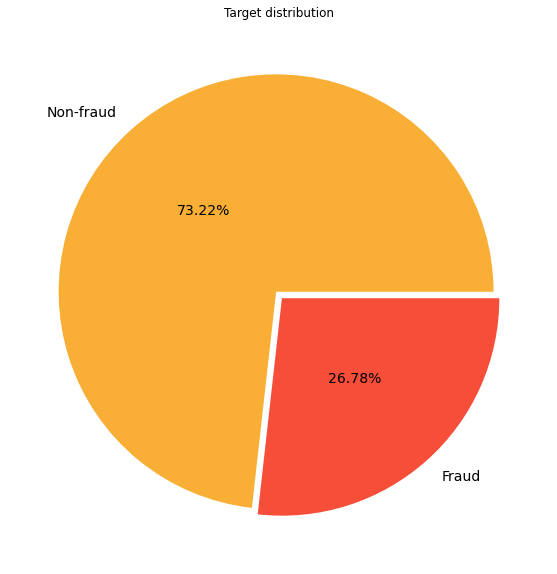

In [123]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

(18069, 44)


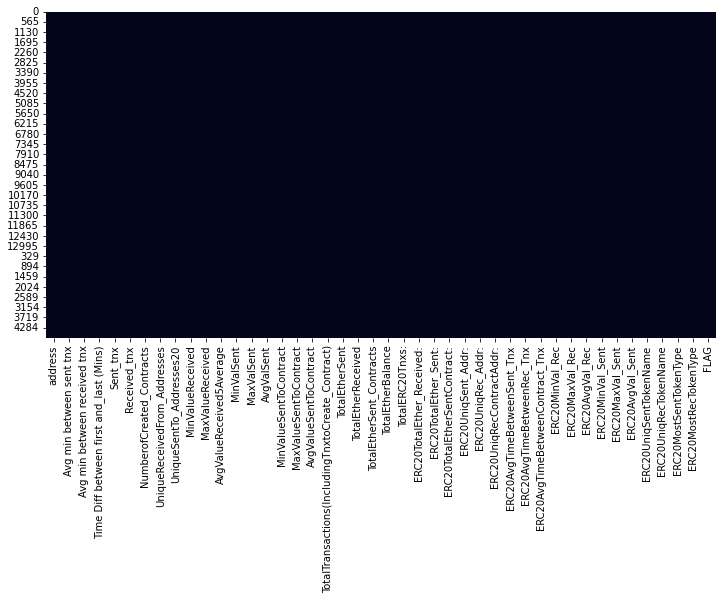

In [124]:
# Visualize if there is missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [125]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')
print("###")
# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

Series([], dtype: float64)


###
Avg min between sent tnx                             8.201874e+12
Avg min between received tnx                         3.006392e+13
Time Diff between first and_last (Mins)              1.486583e+15
Sent_tnx                                             5.406622e+05
Received_tnx                                         7.214803e+06
NumberofCreated_Contracts                            4.674718e+03
UniqueReceivedFrom_Addresses                         9.572472e+05
UniqueSentTo_Addresses20                             6.755964e+04
MinValueReceived                                     8.371137e+39
MaxValueReceived                                     2.026455e+44
AvgValueReceived5Average                             1.115386e+40
MinValSent                                           3.499645e+43
MaxValSent                                           1.286312e+44
AvgValSent                                           3.507768e+43
MinValueSentToContract                     

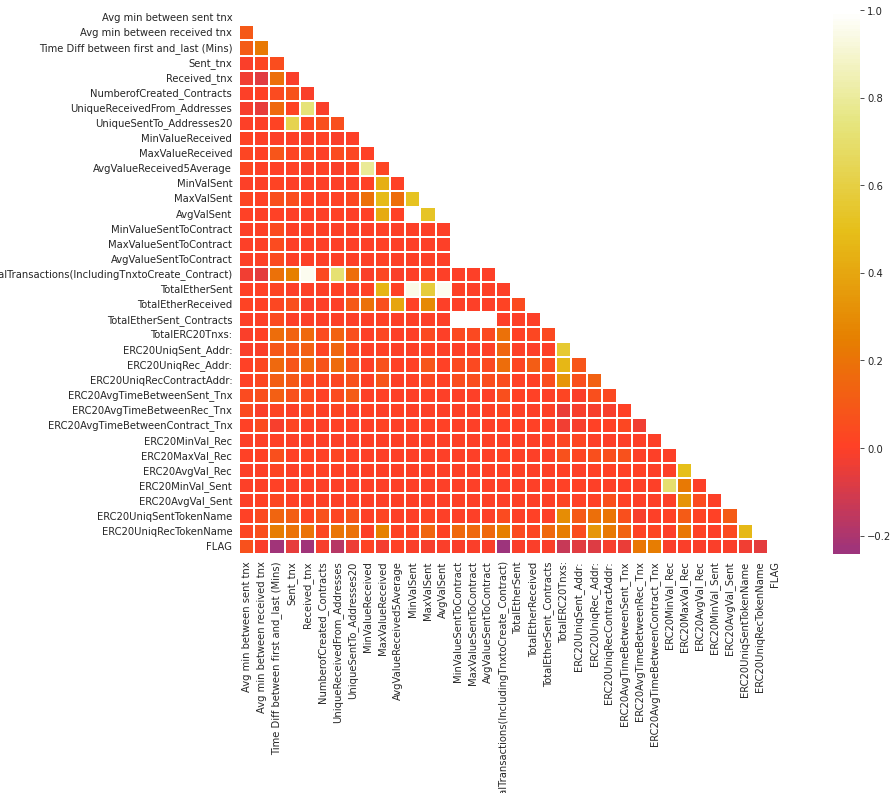

In [126]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [127]:
# Drop one of those highly correlated features
drop = ['TotalTransactions(IncludingTnxtoCreate_Contract)', 'TotalEtherSent_Contracts', 'MaxValueSentToContract', 'ERC20AvgVal_Rec',
        'ERC20MaxVal_Rec', 'ERC20MinVal_Rec', 'ERC20UniqRecContractAddr:', 'MaxValSent', 'ERC20AvgVal_Sent',
        'ERC20MinVal_Sent', 'ERC20MaxVal_Sent', 'TotalERC20Tnxs:', 'AvgValueSentToContract', 'UniqueSentTo_Addresses20',
        'UniqueReceivedFrom_Addresses', 'TotalEtherReceived', 'ERC20UniqSentTokenName', 'MinValueReceived', 'MinValSent', 'ERC20UniqRecTokenName' ]
df.drop(drop, axis=1, inplace=True)

In [128]:
# drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
#         ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
#         ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
#         'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
# df.drop(drop, axis=1, inplace=True)

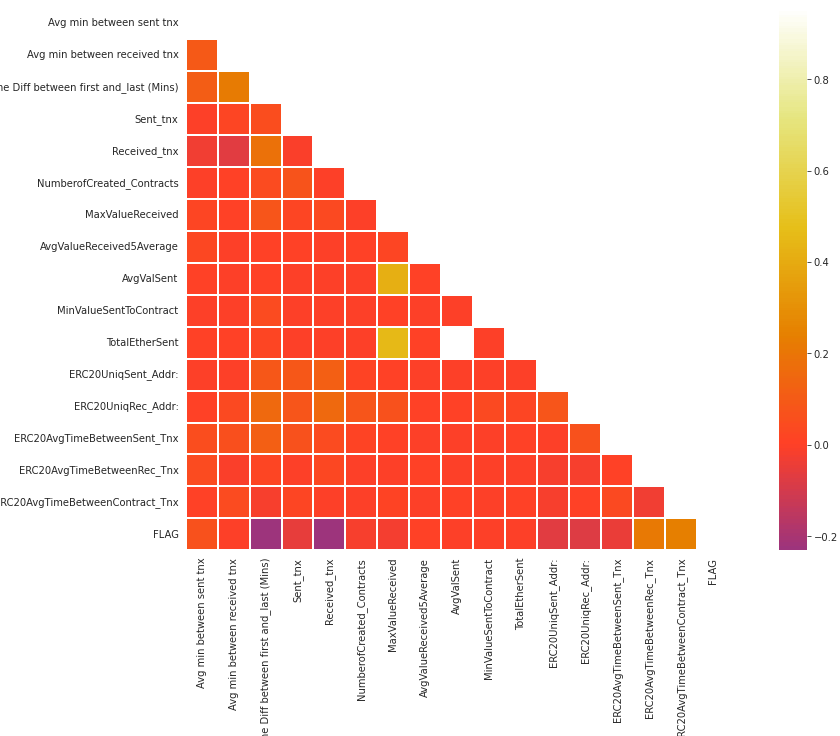

In [129]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [130]:
columns = df.columns
columns

Index(['address', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and_last (Mins)', 'Sent_tnx', 'Received_tnx',
       'NumberofCreated_Contracts', 'MaxValueReceived',
       'AvgValueReceived5Average', 'AvgValSent', 'MinValueSentToContract',
       'TotalEtherSent', 'TotalEtherBalance', 'ERC20TotalEther_Received:',
       'ERC20TotalEther_Sent:', 'ERC20TotalEtherSentContract:',
       'ERC20UniqSent_Addr:', 'ERC20UniqRec_Addr:',
       'ERC20AvgTimeBetweenSent_Tnx', 'ERC20AvgTimeBetweenRec_Tnx',
       'ERC20AvgTimeBetweenContract_Tnx', 'ERC20MostSentTokenType',
       'ERC20MostRecTokenType', 'FLAG'],
      dtype='object')

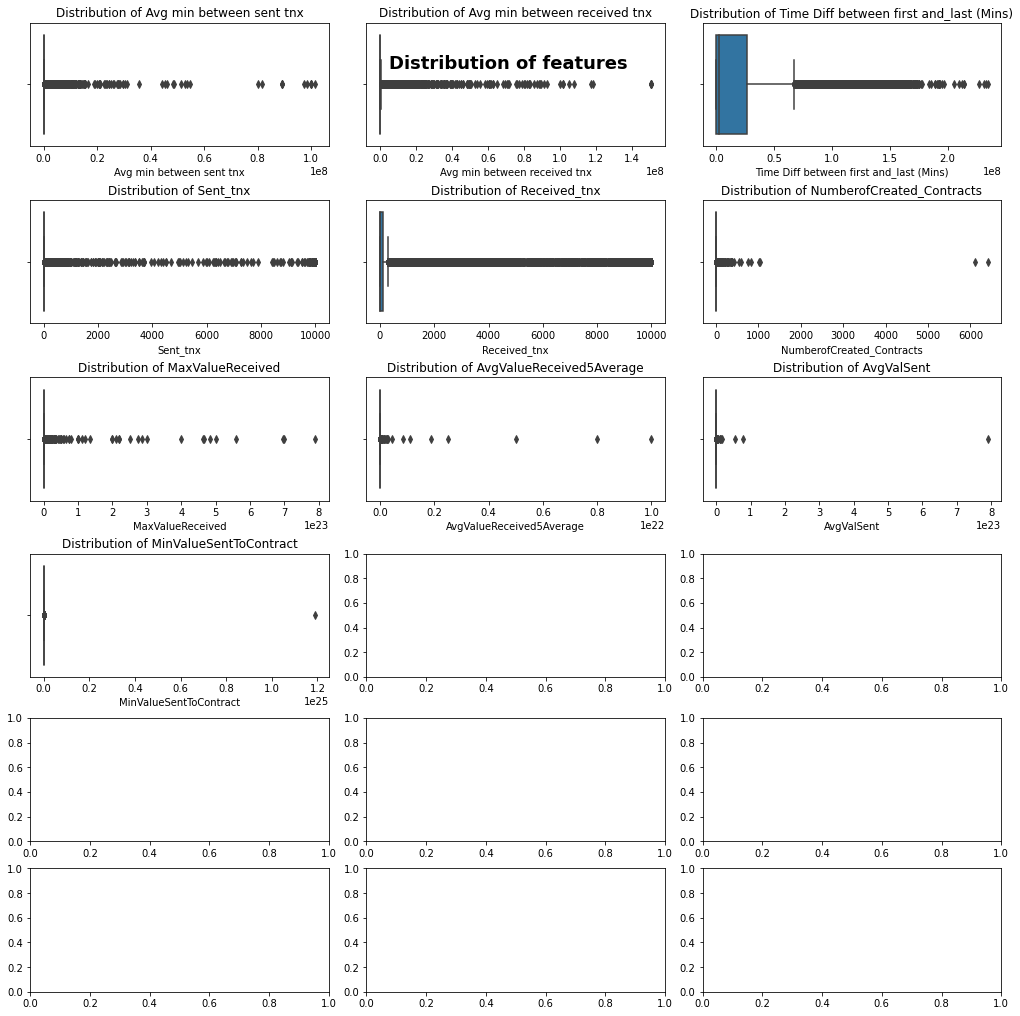

In [131]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
# ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
# ax10.set_title(f'Distribution of {columns[11]}')

# ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
# ax11.set_title(f'Distribution of {columns[12]}')
 
# ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
# ax12.set_title(f'Distribution of {columns[13]}')
 
# ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
# ax13.set_title(f'Distribution of {columns[14]}')
 
# ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
# ax14.set_title(f'Distribution of {columns[15]}')
 
# ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
# ax15.set_title(f'Distribution of {columns[16]}')
 
# ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
# ax16.set_title(f'Distribution of {columns[17]}')
 
# ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
# ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [132]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column FLAG has the following distribution: 
0    13231
1     4838
Name: FLAG, dtype: int64
